In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
from base import *
from game import *
from rules import *
from sim import *

In [274]:
n = 3
m = 3
# mg = MultilinearGame(np.array([[[3,0],[5,1]],[[3,5],[0,1]]]))
# mg = MultilinearGame(np.random.rand(*((n,) + (m,) * n)))
# learner = ExtraGradient(lr=lambda t: t**(-0.5), proj=proj_sim)
# learner = OptimisticGradient(lr=0.1, proj=proj_sim)
learner = BlumMansour(OptimisticGradient(lr=0.1, proj=proj_sim))
# learner = OFTRL(lr=0.1, proj=proj_sim, barrier=log_barrier, optimism=1)
# learner = BlumMansour(OFTRL(lr=0.05, proj=proj_sim, barrier=log_barrier))
# sim = GameSim(mg, learner, [None, "swap"])
sim = GameSim(mg, learner, [None, "swap"])

In [288]:
%%time
sim.play(5000)

CPU times: total: 9.23 s
Wall time: 9.48 s


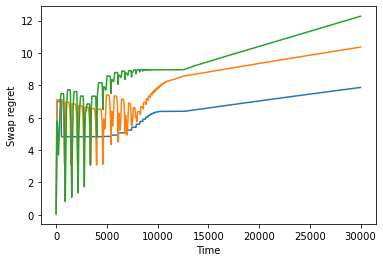

In [289]:
mode: Literal["swap"] | None
mode = "swap"

# regrets = np.maximum(sim.regret_recorders[mode](), 0)
regrets = sim.regret_recorders[mode]()
plt.plot([(i + 1) for i in range(regrets.shape[1])], regrets.transpose())
# plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Swap regret" if mode == "swap" else "External regret")
None

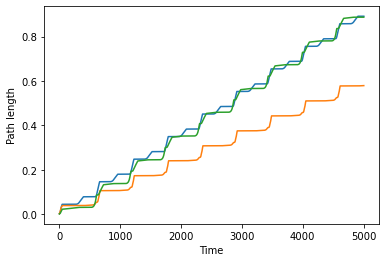

In [105]:
path_length = sim.path_length(order=1,power=2)
plt.plot([(i + 1) for i in range(path_length.shape[0])], path_length)
# plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Path length")
None

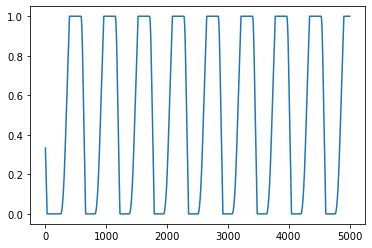

In [103]:
tmp = np.array([a[0] for a, _, _ in sim.trajectory])
plt.plot(tmp[:,1])

In [104]:
sim.regret_recorders["swap"]()[:,-1]

array([ 3.64541877,  2.70944693, 26.46797094])

In [132]:
mg.weight

array([[[[0.38725044, 0.34240753, 0.02810337],
         [0.55074954, 0.60687508, 0.69976101],
         [0.59657795, 0.46950552, 0.27485584]],

        [[0.09728714, 0.60672773, 0.54360432],
         [0.26454208, 0.25278358, 0.50165633],
         [0.04169336, 0.11747752, 0.49429097]],

        [[0.77173717, 0.86346229, 0.3505611 ],
         [0.35594837, 0.31400333, 0.64525392],
         [0.55258491, 0.53210521, 0.04410721]]],


       [[[0.73805032, 0.30159735, 0.84759458],
         [0.04005955, 0.11278326, 0.84749458],
         [0.64340064, 0.04897343, 0.61148755]],

        [[0.35718986, 0.67194212, 0.51199374],
         [0.39911936, 0.94905635, 0.50967383],
         [0.66591209, 0.88617184, 0.55056259]],

        [[0.45704226, 0.90936315, 0.90983527],
         [0.50159104, 0.18228659, 0.30326444],
         [0.3209547 , 0.3873199 , 0.47680925]]],


       [[[0.65115376, 0.47580537, 0.35108451],
         [0.88925328, 0.10580608, 0.90254684],
         [0.09564831, 0.31838851, 0.14622075

In [273]:
mg = MultilinearGame(np.array([[[[0.38725044, 0.34240753, 0.02810337],
         [0.55074954, 0.60687508, 0.69976101],
         [0.59657795, 0.46950552, 0.27485584]],

        [[0.09728714, 0.60672773, 0.54360432],
         [0.26454208, 0.25278358, 0.50165633],
         [0.04169336, 0.11747752, 0.49429097]],

        [[0.77173717, 0.86346229, 0.3505611 ],
         [0.35594837, 0.31400333, 0.64525392],
         [0.55258491, 0.53210521, 0.04410721]]],


       [[[0.73805032, 0.30159735, 0.84759458],
         [0.04005955, 0.11278326, 0.84749458],
         [0.64340064, 0.04897343, 0.61148755]],

        [[0.35718986, 0.67194212, 0.51199374],
         [0.39911936, 0.94905635, 0.50967383],
         [0.66591209, 0.88617184, 0.55056259]],

        [[0.45704226, 0.90936315, 0.90983527],
         [0.50159104, 0.18228659, 0.30326444],
         [0.3209547 , 0.3873199 , 0.47680925]]],


       [[[0.65115376, 0.47580537, 0.35108451],
         [0.88925328, 0.10580608, 0.90254684],
         [0.09564831, 0.31838851, 0.14622075]],

        [[0.17251205, 0.02022372, 0.28844002],
         [0.15794837, 0.35324549, 0.1150825 ],
         [0.13013662, 0.9649251 , 0.03403977]],

        [[0.80036352, 0.65117747, 0.85317148],
         [0.52376247, 0.85882519, 0.3877483 ],
         [0.96182964, 0.28177822, 0.2208274 ]]]]))

In [173]:
# EG with lr=T^-0.5
mg.weight

array([[[[2.91588928e-01, 5.38270322e-01, 6.63796692e-01],
         [5.73193286e-01, 3.36172319e-01, 4.11491944e-02],
         [5.22280749e-01, 8.49161216e-01, 6.01760933e-01]],

        [[1.32306257e-01, 7.17656007e-01, 4.65163844e-01],
         [2.95024287e-01, 1.87750426e-01, 9.24720743e-01],
         [5.39940317e-01, 1.46573188e-01, 8.95618401e-01]],

        [[4.33905926e-01, 2.93904051e-01, 6.20350305e-01],
         [2.20712409e-01, 3.73775624e-01, 8.93232270e-01],
         [3.36333591e-01, 7.86280979e-01, 5.73633329e-01]]],


       [[[5.51068523e-01, 9.47890027e-01, 1.61379752e-01],
         [7.62035746e-01, 8.96912376e-04, 5.51022221e-01],
         [7.67843932e-02, 5.53675132e-01, 7.83080824e-01]],

        [[7.01929373e-01, 6.98420407e-01, 2.13333832e-01],
         [1.66060767e-01, 9.80288140e-01, 7.23901686e-01],
         [2.29250866e-01, 4.91477502e-01, 9.36936165e-01]],

        [[1.36457682e-01, 9.59990424e-01, 9.67244572e-02],
         [2.32800218e-01, 3.64384467e-01, 9.

In [179]:
mg = MultilinearGame(np.array([[[[2.91588928e-01, 5.38270322e-01, 6.63796692e-01],
         [5.73193286e-01, 3.36172319e-01, 4.11491944e-02],
         [5.22280749e-01, 8.49161216e-01, 6.01760933e-01]],

        [[1.32306257e-01, 7.17656007e-01, 4.65163844e-01],
         [2.95024287e-01, 1.87750426e-01, 9.24720743e-01],
         [5.39940317e-01, 1.46573188e-01, 8.95618401e-01]],

        [[4.33905926e-01, 2.93904051e-01, 6.20350305e-01],
         [2.20712409e-01, 3.73775624e-01, 8.93232270e-01],
         [3.36333591e-01, 7.86280979e-01, 5.73633329e-01]]],


       [[[5.51068523e-01, 9.47890027e-01, 1.61379752e-01],
         [7.62035746e-01, 8.96912376e-04, 5.51022221e-01],
         [7.67843932e-02, 5.53675132e-01, 7.83080824e-01]],

        [[7.01929373e-01, 6.98420407e-01, 2.13333832e-01],
         [1.66060767e-01, 9.80288140e-01, 7.23901686e-01],
         [2.29250866e-01, 4.91477502e-01, 9.36936165e-01]],

        [[1.36457682e-01, 9.59990424e-01, 9.67244572e-02],
         [2.32800218e-01, 3.64384467e-01, 9.12566459e-01],
         [4.48466782e-01, 4.08786178e-01, 4.54737059e-01]]],


       [[[4.96979701e-01, 5.73149057e-01, 5.80811303e-02],
         [6.25976166e-01, 7.99815120e-01, 2.72900650e-01],
         [3.75442993e-01, 6.81988372e-01, 3.67791698e-01]],

        [[6.76109064e-01, 8.92756670e-01, 2.65146770e-01],
         [4.60721317e-01, 1.14977121e-02, 9.04803100e-01],
         [2.31161535e-01, 9.10076883e-01, 7.19657184e-01]],

        [[5.76236065e-01, 7.15730751e-01, 2.18929977e-01],
         [5.17297131e-01, 2.44306175e-01, 9.38795659e-01],
         [5.62939244e-02, 3.86502675e-01, 8.75961302e-01]]]]))